In [1]:
## Library Import

# Basic
import re
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# AutoML optuna library
import optuna
import optuna.integration.lightgbm as lgb

# Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Metric
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## for PCA
from sklearn.decomposition import PCA

# for VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('final_data_120_by_ffill_ver1.csv', index_col = 0)

In [3]:
df.reset_index(inplace = True)

In [4]:
date = df.date

In [5]:
target = df['KRXsemiconductor_close']

In [6]:
X_data = df.copy()

In [7]:
X_data.drop(['date', 'KRXsemiconductor_close'], axis = 1, inplace = True)

In [8]:
410/len(df)

0.12748756218905472

In [9]:
df.tail(409)

,date,KRXsemiconductor_close,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,...,QCOM_close260,SamsungElectronics_close60,SamsungElectronics_close120,SamsungElectronics_close260,ShinEtsuChemical_close60,ShinEtsuChemical_close120,ShinEtsuChemical_close260,Siltronic_close60,Siltronic_close120,Siltronic_close260,SKhynix_close60,SKhynix_close120,SKhynix_close260,Sumco_close60,Sumco_close120,Sumco_close260,TokyoElectron_close60,TokyoElectron_close120,TokyoElectron_close260,TSMC_close60,TSMC_close120,TSMC_close260,UMC_close60,UMC_close120,UMC_close260
2807,2017-08-30,0.050148,2.2,2.2,2.4,3.6,1.4,16.6,19356.65,3.9,1.3,1.3,1.6,1.7,1.5,1.61161,0.1,0.1,0.0,0.0,1.9,1.8,4.3,8.5,243,...,-0.280787,-0.028592,0.028542,0.268530,-0.033945,0.024332,0.098199,0.058313,0.149773,0.680072,0.016188,0.212251,0.421275,0.168751,-0.011171,0.448085,0.129951,0.173159,0.206674,0.044786,0.085971,0.182249,0.021947,0.164820,0.213781
2808,2017-08-31,0.029196,2.2,2.2,2.4,3.6,1.4,16.6,19356.65,3.9,1.3,1.3,1.6,1.7,1.5,1.61161,0.1,0.1,0.0,0.0,1.9,1.8,4.3,8.5,243,...,-0.252336,-0.025998,0.031136,0.264915,-0.026543,0.033079,0.121641,0.069859,0.149696,0.740688,0.017647,0.213709,0.402910,0.160848,-0.023522,0.424516,0.129428,0.172635,0.198464,0.039641,0.075092,0.169083,0.026279,0.164046,0.218113
2809,2017-09-01,0.052751,2.2,2.2,2.4,3.6,1.4,16.6,19356.65,3.9,1.3,1.3,1.6,1.7,1.5,1.61161,0.1,0.1,0.0,0.0,1.9,1.8,4.3,8.5,243,...,-0.263306,-0.015795,0.020870,0.278544,-0.032491,0.015979,0.123081,0.099288,0.121808,0.683490,0.035559,0.206181,0.409834,0.131683,-0.047084,0.365417,0.113816,0.159997,0.182640,0.045656,0.081807,0.180639,0.074023,0.197309,0.263191
2810,2017-09-04,0.063231,2.2,2.2,2.4,3.6,1.4,16.6,19356.65,3.9,1.3,1.3,1.6,1.7,1.5,1.61161,0.1,0.1,0.0,0.0,1.9,1.8,4.3,8.5,243,...,-0.240300,-0.042940,0.011359,0.249888,0.003087,0.009290,0.121588,0.070679,0.121632,0.600829,0.000000,0.197410,0.383671,0.060381,-0.048440,0.317114,0.101668,0.146660,0.163594,0.056755,0.088249,0.195089,0.074320,0.198989,0.259613
2811,2017-09-05,0.061467,2.2,2.2,2.4,3.6,1.4,16.6,19356.65,3.9,1.3,1.3,1.6,1.7,1.5,1.61161,0.1,0.1,0.0,0.0,1.9,1.8,4.3,8.5,243,...,-0.287388,-0.023252,-0.005545,0.264291,0.009257,-0.005688,0.116194,0.098343,0.136939,0.653053,0.048360,0.205767,0.437068,0.071822,-0.045844,0.362417,0.104107,0.142398,0.165590,0.063584,0.068181,0.207421,0.096942,0.200973,0.280462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2019-04-30,-0.006857,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,216,...,0.280174,0.016493,0.169532,0.017602,0.114831,0.198769,-0.017385,0.002272,0.233292,-0.404633,0.120951,0.266801,0.046640,-0.016950,0.000000,-0.392619,0.029788,0.101573,-0.046908,0.068177,0.112336,0.065328,0.103598,0.124952,-0.171683
3212,2019-05-02,-0.012257,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,212,...,0.279021,0.017582,0.169330,0.016474,0.116461,0.208391,-0.008918,-0.024869,0.203862,-0.359992,0.142241,0.286440,0.061321,-0.012685,0.004264,-0.384075,0.029788,0.101573,-0.047926,0.067836,0.142539,0.060739,0.106768,0.138971,-0.155054
3213,2019-05-03,-0.012498,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,212,...,0.301923,0.009983,0.186298,0.023451,0.116918,0.210902,-0.017357,-0.034451,0.219205,-0.348634,0.137090,0.331752,0.073533,-0.008403,0.051960,-0.345294,0.012349,0.101573,-0.028927,0.103762,0.182816,0.088638,0.122115,0.176730,-0.142062
3214,2019-05-07,-0.009651,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1

In [10]:
X_data

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,...,QCOM_close260,SamsungElectronics_close60,SamsungElectronics_close120,SamsungElectronics_close260,ShinEtsuChemical_close60,ShinEtsuChemical_close120,ShinEtsuChemical_close260,Siltronic_close60,Siltronic_close120,Siltronic_close260,SKhynix_close60,SKhynix_close120,SKhynix_close260,Sumco_close60,Sumco_close120,Sumco_close260,TokyoElectron_close60,TokyoElectron_close120,TokyoElectron_close260,TSMC_close60,TSMC_close120,TSMC_close260,UMC_close60,UMC_close120,UMC_close260
0,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,3.6,2.1,3.0,2.05608,0.1,0.2,0.1,0.3,2.6,2.2,4.8,8.4,303,2456,307,...,-0.166448,-0.004612,-0.015291,0.019535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019481,-0.189791,0.059371,0.000000,0.000000,0.000000,0.007040,-0.020827,-0.082307,0.067354,0.060755,-0.011141,0.116359,0.139448,-0.028507
1,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,3.6,2.1,3.0,2.05608,0.1,0.2,0.1,0.3,2.6,2.2,4.8,8.4,295,2439,307,...,-0.166448,-0.020140,-0.039883,0.019535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016260,-0.206221,0.059371,0.000000,0.000000,0.000000,0.007040,-0.020827,-0.082307,0.069106,0.062508,-0.011141,0.120974,0.144063,-0.028507
2,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,3.6,2.1,3.0,2.05608,0.1,0.2,0.1,0.3,2.6,2.2,4.8,8.4,295,2439,307,...,-0.166448,-0.010794,-0.080400,0.019535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022691,-0.123461,0.059371,0.000000,0.000000,0.000000,0.007040,-0.020827,-0.082307,0.072767,0.054942,-0.011141,0.132092,0.165488,-0.028507
3,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,3.6,2.1,3.0,2.05608,0.1,0.2,0.1,0.3,2.6,2.2,4.8,8.4,295,2439,307,...,-0.166448,0.063013,-0.047699,0.019535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079247,-0.106785,0.059371,0.000000,0.000000,0.000000,0.042696,-0.064081,-0.082307,0.121722,0.056036,-0.011141,0.180817,0.175651,-0.028507
4,5.4,3.4,4.5,6.1,5.2,102.7,13603.93,6.6,2.8,2.3,3.6,2.1,3.0,2.05608,0.1,0.2,0.1,0.3,2.6,2.2,4.8,8.4,295,2439,307,...,-0.166448,0.064034,-0.040035,0.019535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110953,-0.112183,0.059371,0.000000,0.000000,0.000000,0.021120,-0.064081,-0.082307,0.088308,0.008748,-0.011141,0.141407,0.113579,-0.028507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,216,1755,56,...,0.280174,0.016493,0.169532,0.017602,0.114831,0.198769,-0.017385,0.002272,0.233292,-0.404633,0.120951,0.266801,0.046640,-0.016950,0.000000,-0.392619,0.029788,0.101573,-0.046908,0.068177,0.112336,0.065328,0.103598,0.124952,-0.171683
3212,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,212,1726,56,...,0.279021,0.017582,0.169330,0.016474,0.116461,0.208391,-0.008918,-0.024869,0.203862,-0.359992,0.142241,0.286440,0.061321,-0.012685,0.004264,-0.384075,0.029788,0.101573,-0.047926,0.067836,0.142539,0.060739,0.106768,0.138971,-0.155054
3213,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,212,1726,56,...,0.301923,0.009983,0.186298,0.023451,0.116918,0.210902,-0.017357,-0.034451,0.219205,-0.348634,0.137090,0.331752,0.073533,-0.008403,0.051960,-0.345294,0.012349,0.101573,-0.028927,0.103762,0.182816,0.088638,0.122115,0.176730,-0.142062
3214,1.1,2.5,1.4,3.0,-0.4,93.0,20897.80,4.9,1.6,1.7,1.5,2.1,1.3,1.61549,0.2,0.1,0.2,0.2,1.9,2.5,3.8,7.3,212,1726,56,...,0.249592,0.023689,0.146189,0.022548,0.117352,0.105791,-0

In [11]:
#X_data= X_data[['SKLICONEIndex', 'OEKRKLAPIndex', 'NMDPIndex60', 'KOBPFINIndex', 'KOCPIYOYIndex', 'CPIXYOYIndex60', 'KOEAPYIndex60', 'GDPCTOT%Index', 'KOHOINCIndex', 'GVSK10YRIndex', 'USERTOTIndex60', 'SKhynix_close60', 'FDIUSGYOIndex60', 'MGT2REIndex60', 'GDPCPCECIndex60', 'Nvidia_close60', 'KOECSIMQIndex', 'Amazon_close60', 'PCECHNCIndex', 'KODIBALIndex', 'MSERIndex60', 'KOUHTTLIndex', 'Amazon_close260', 'LEIMNOIndex60', 'OEKRN022Index', 'CCMPIndex60', 'FDIDFDMOIndex60', 'QCOM_close60', 'KOCGCGSMIndex', 'TMNOCHNGIndex', 'AWHTOTLIndex60', 'NAPMNEWOIndex60', 'KOECFCSYIndex']]

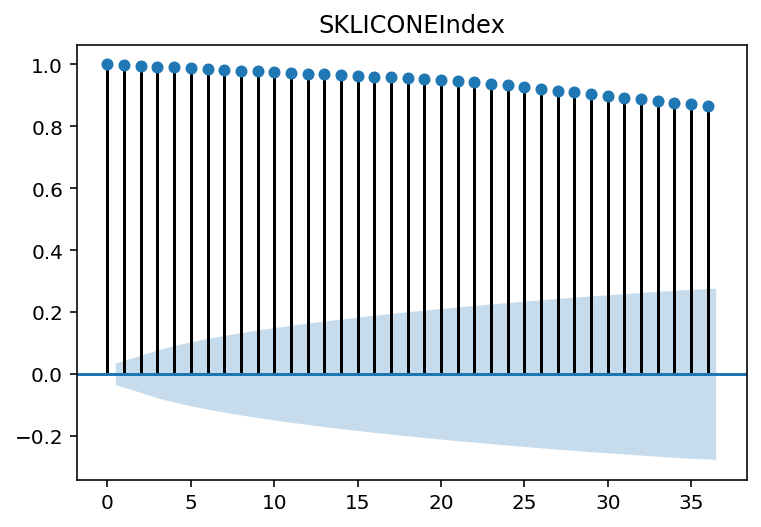

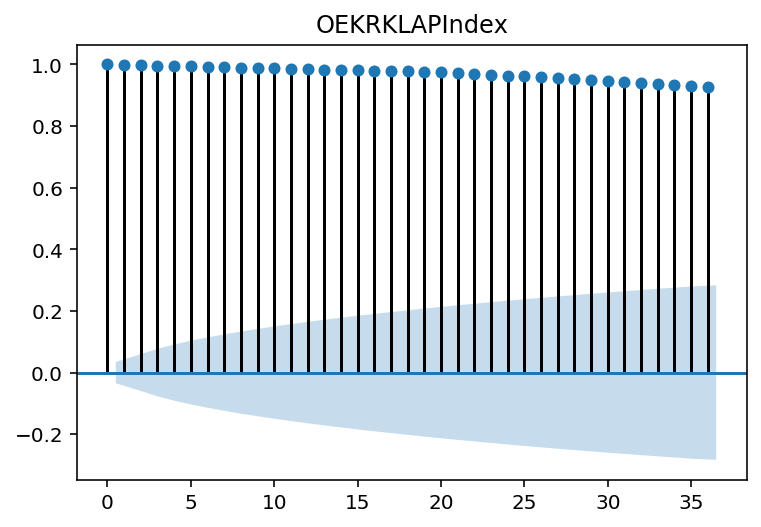

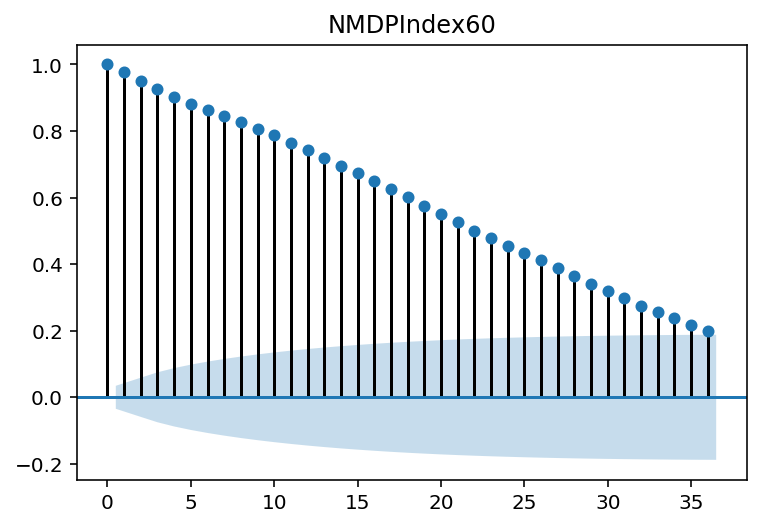

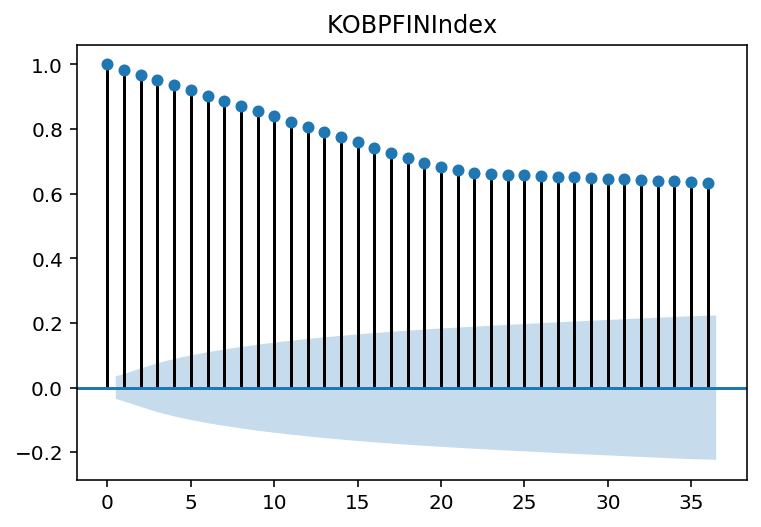

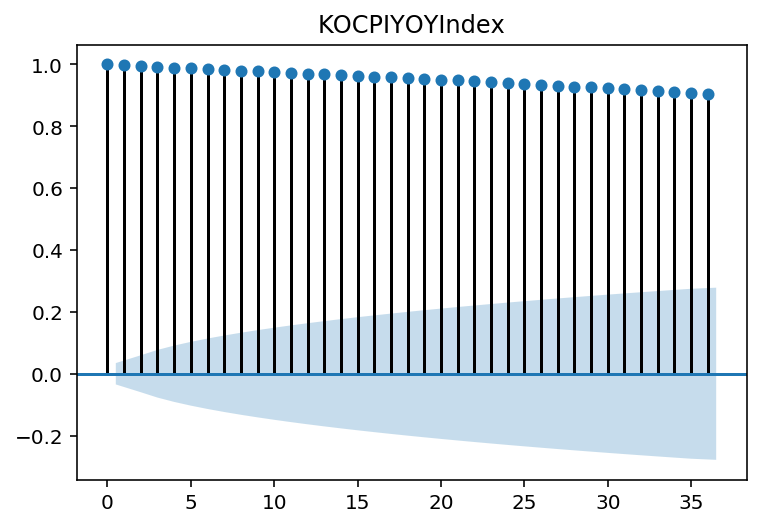

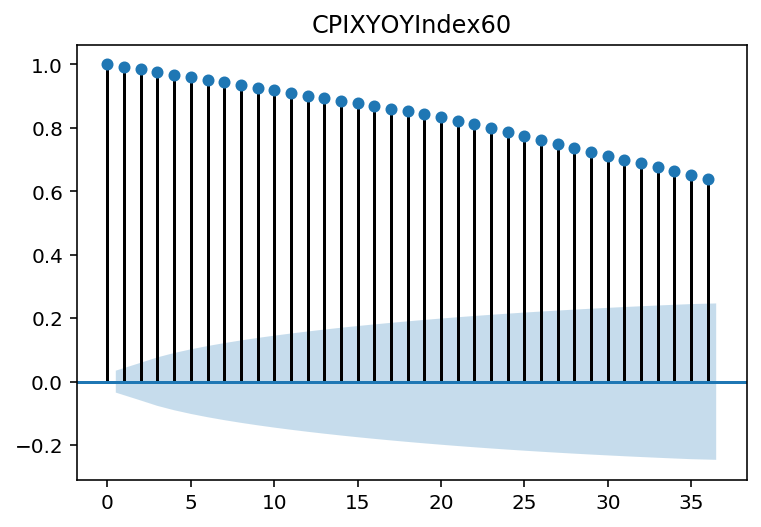

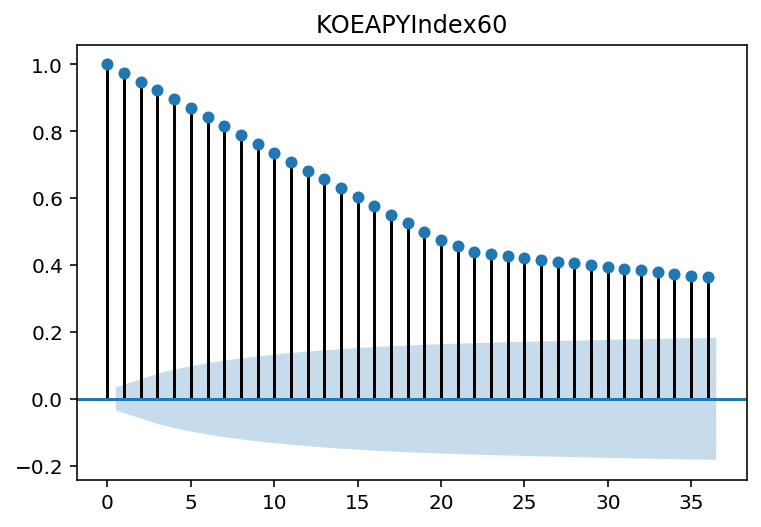

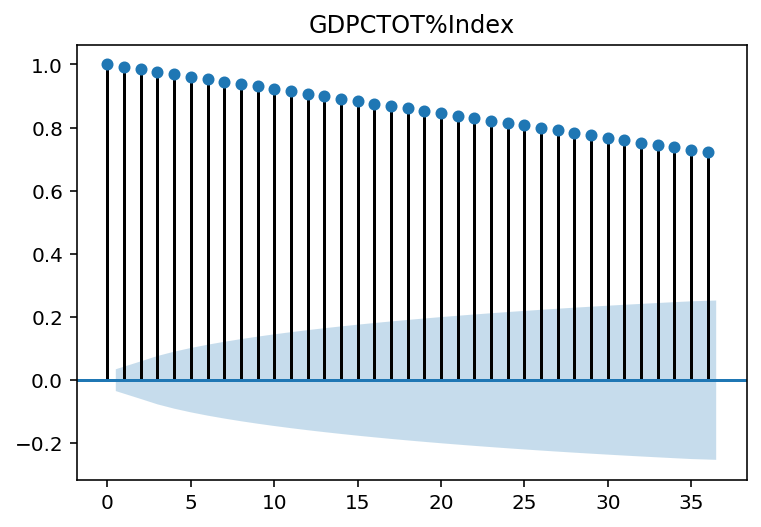

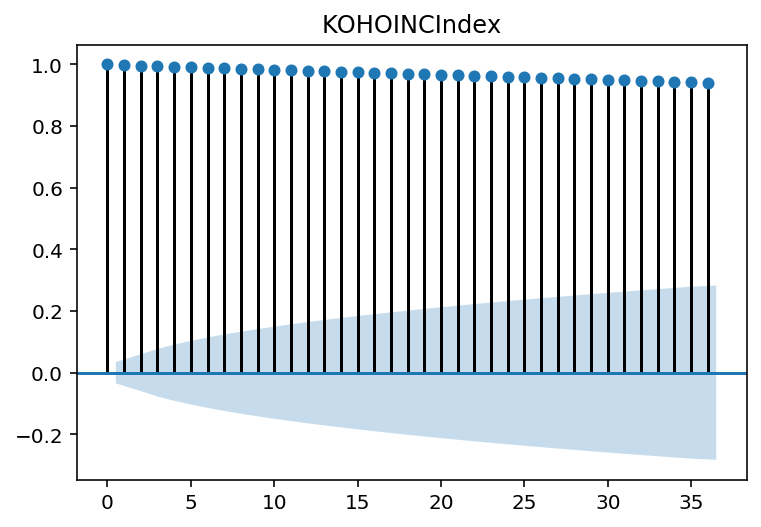

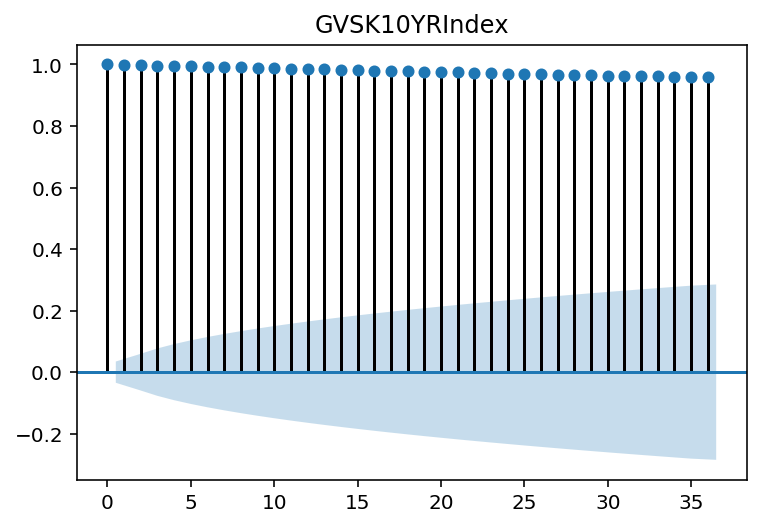

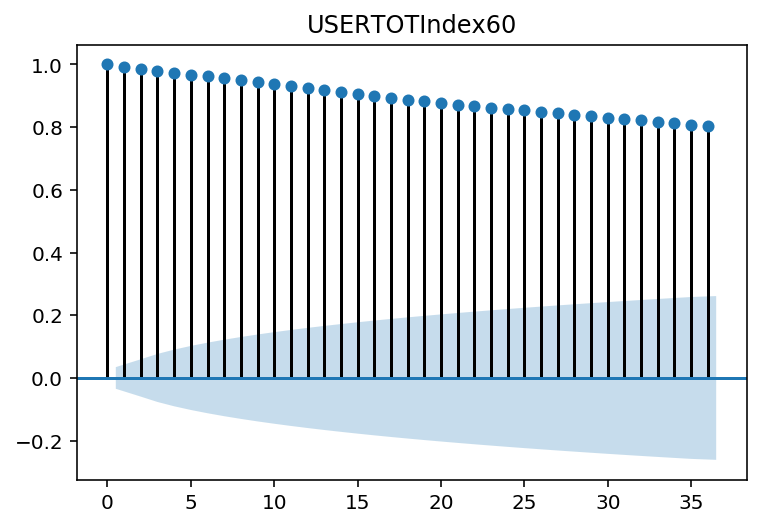

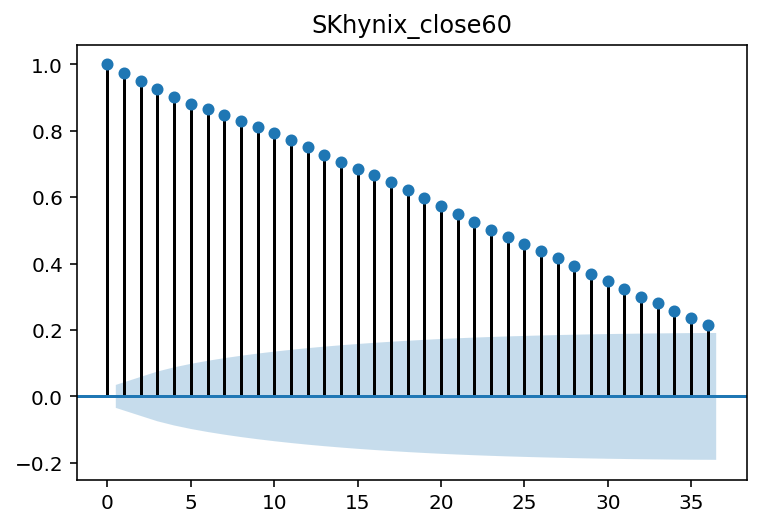

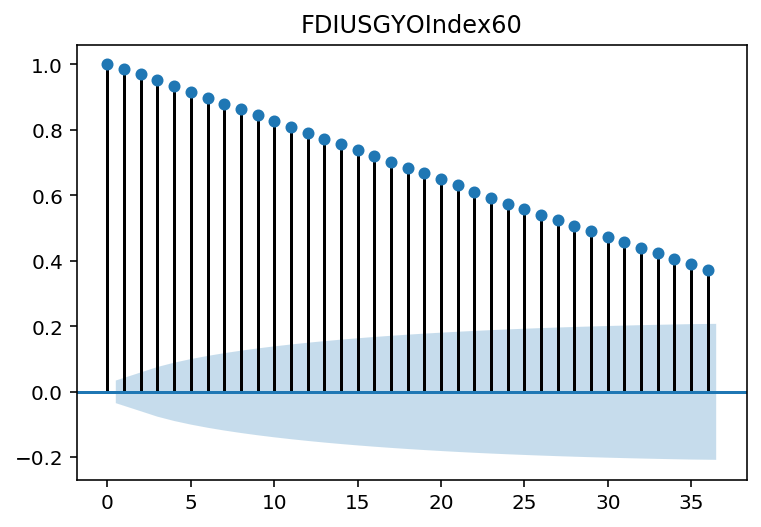

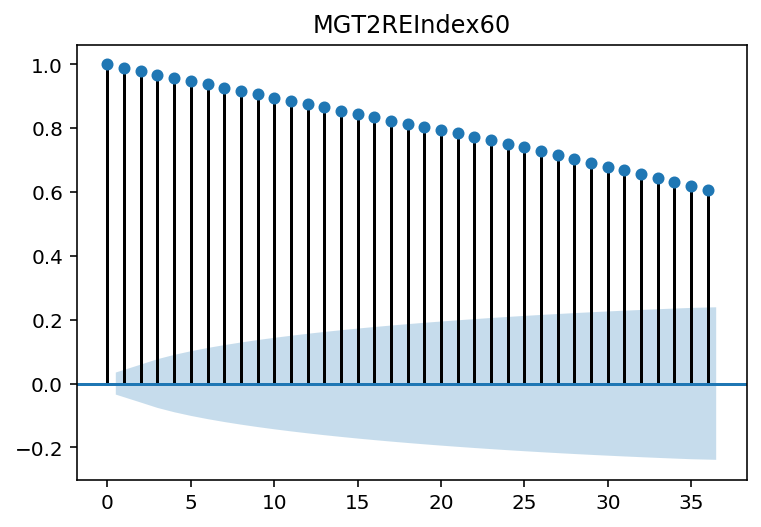

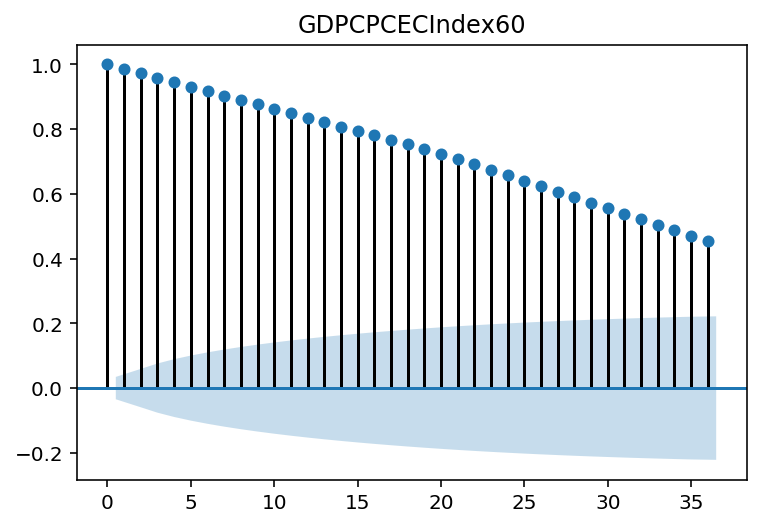

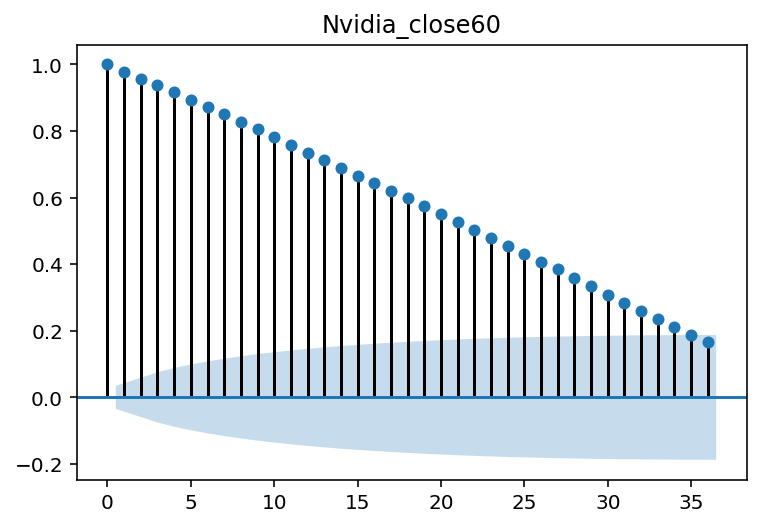

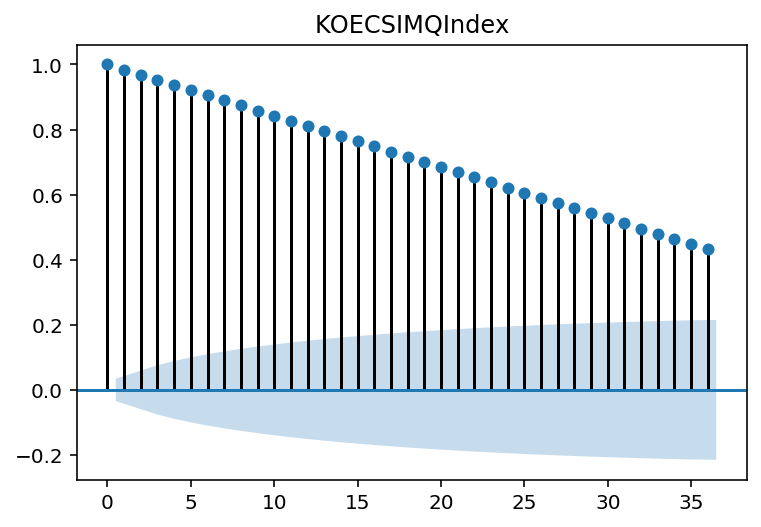

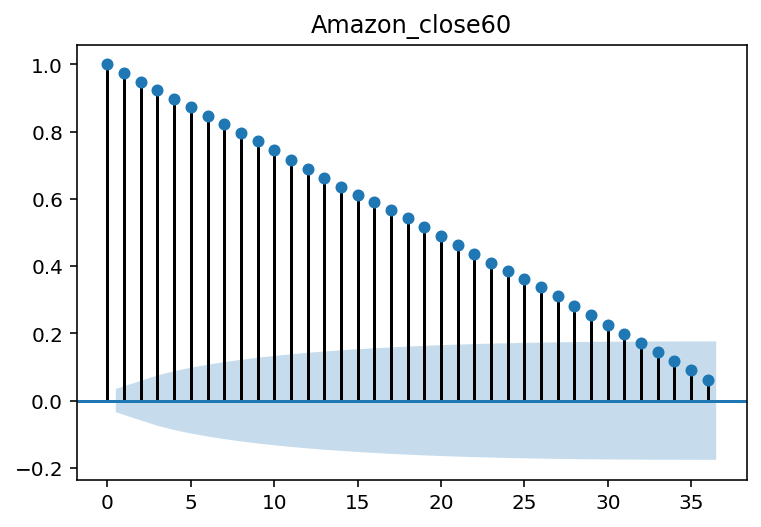

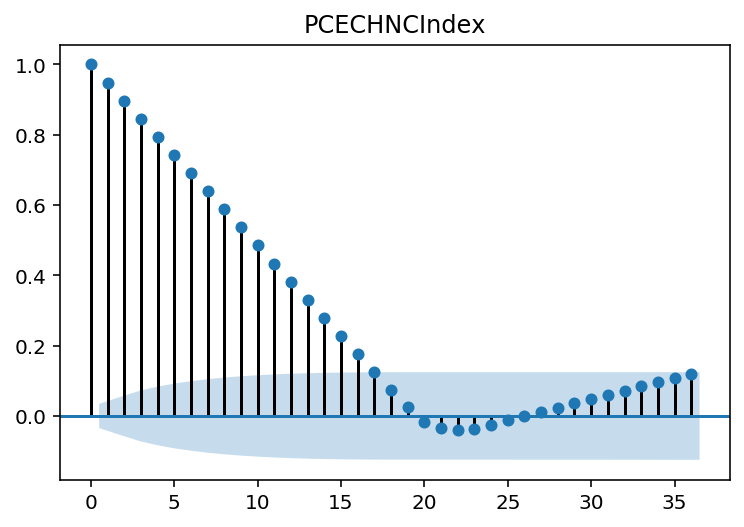

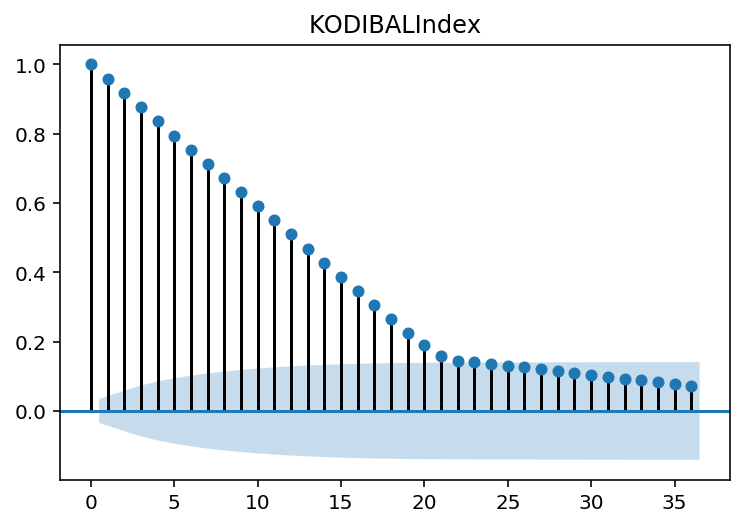

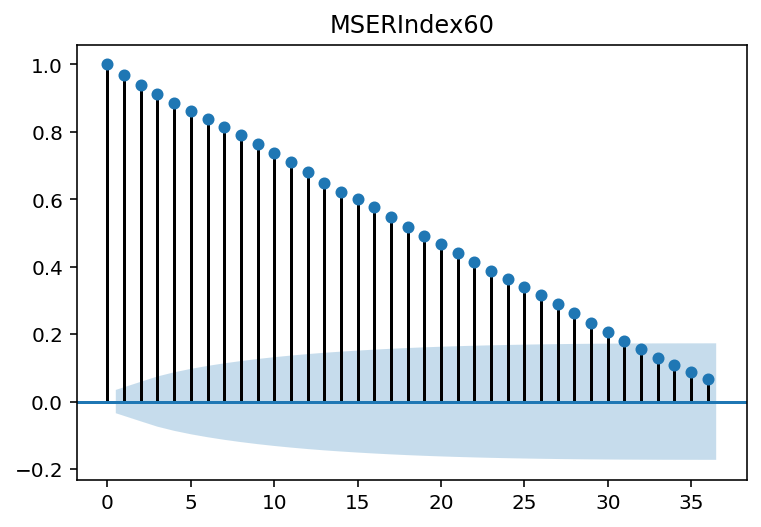

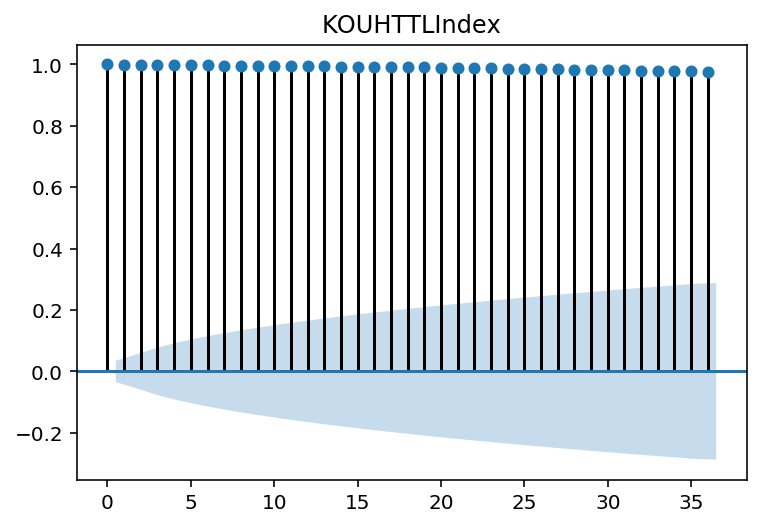

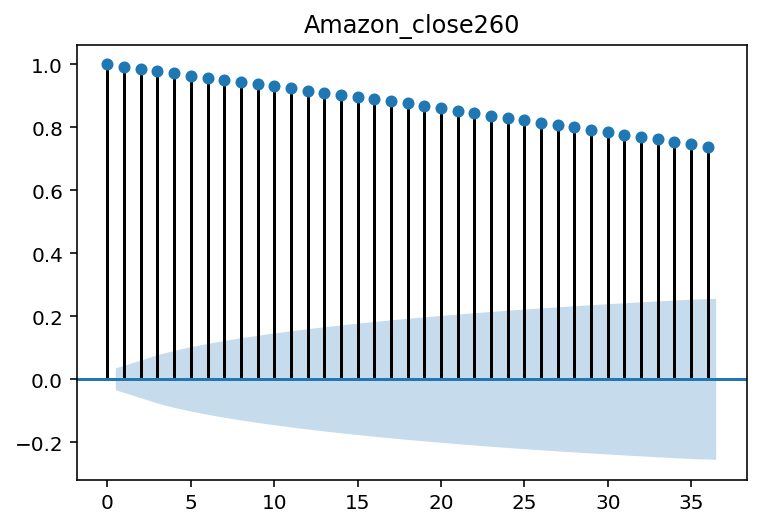

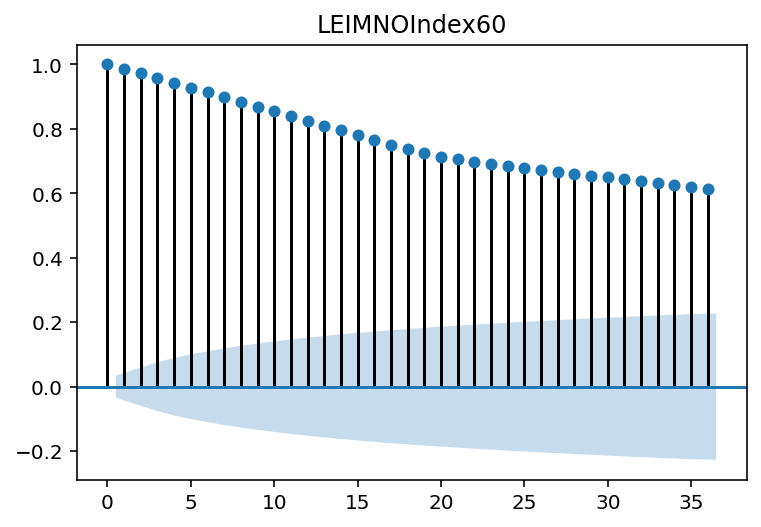

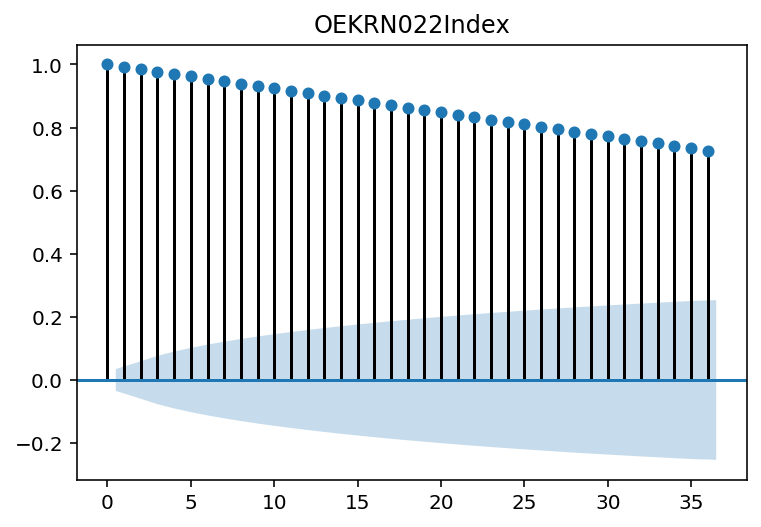

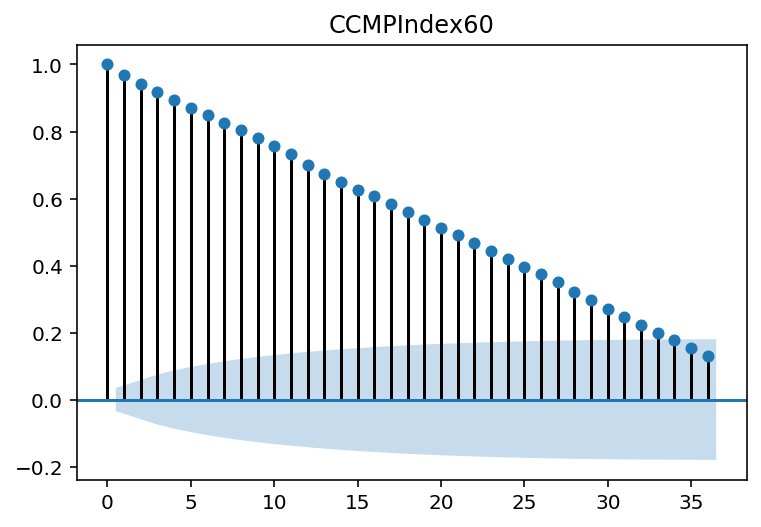

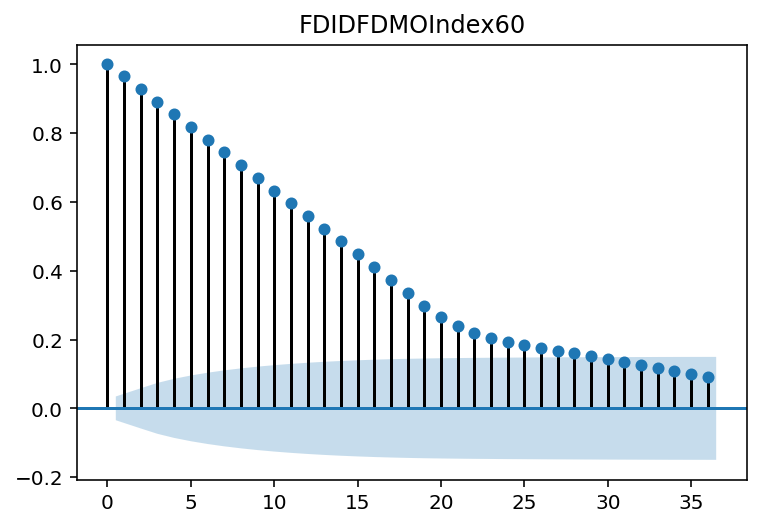

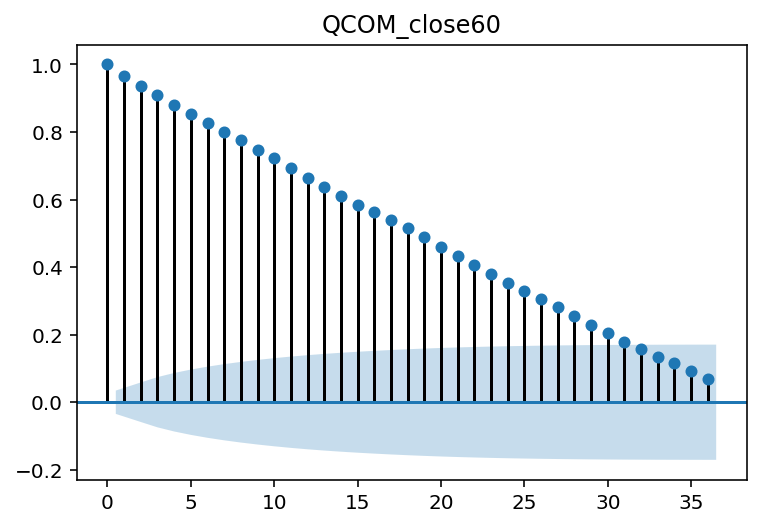

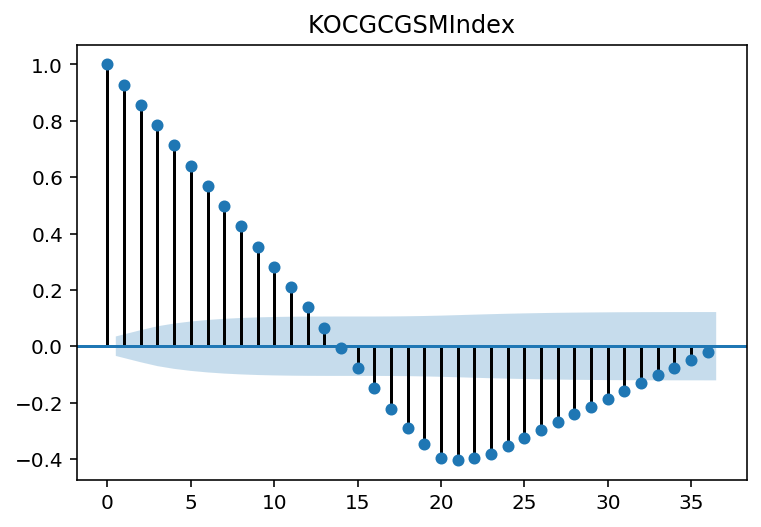

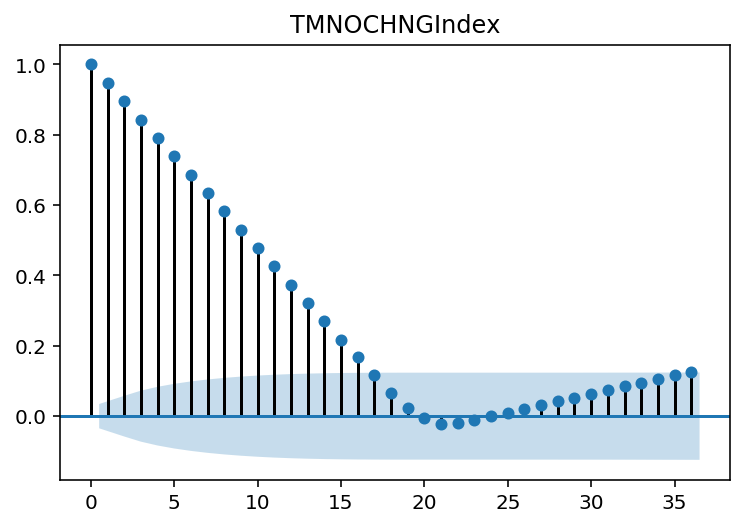

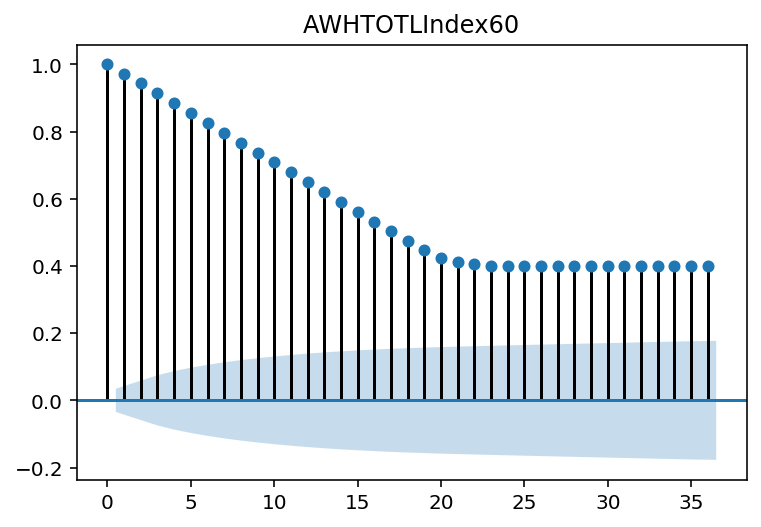

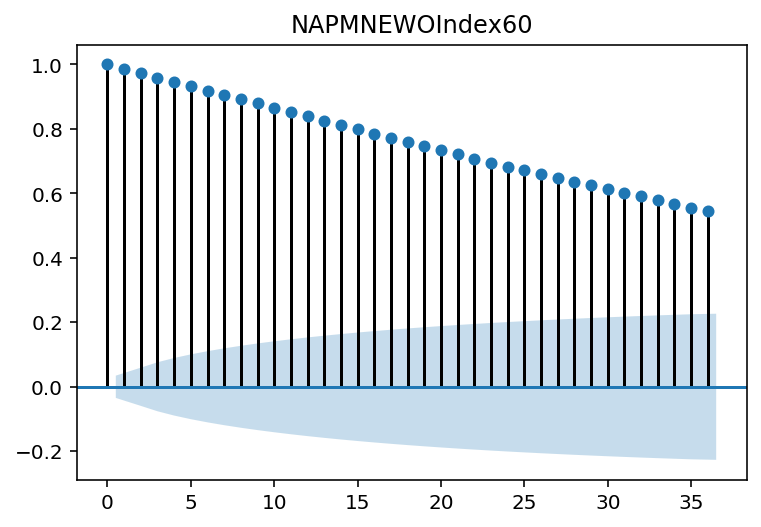

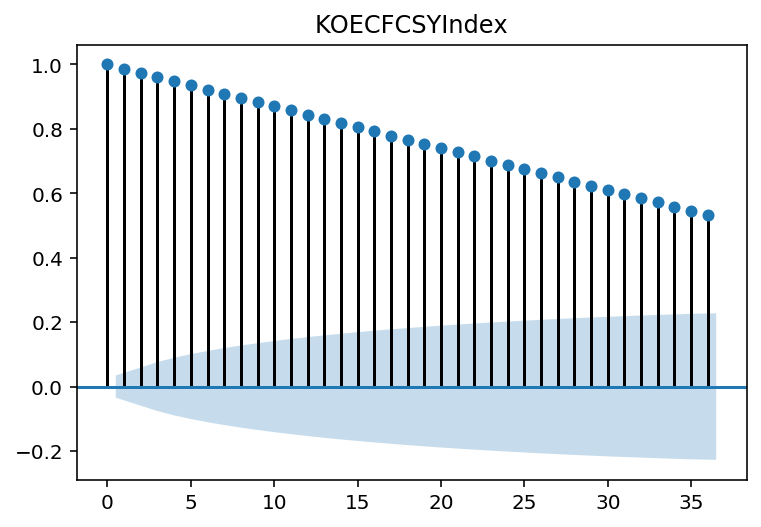

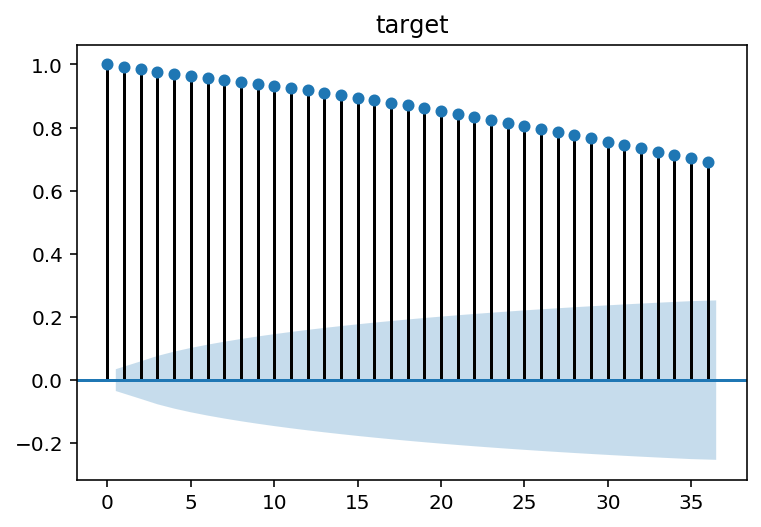

In [93]:
for i in X_data.columns:
    plot_acf(X_data[i])
    plt.title(i)
plt.show()

In [12]:
len(X_data)

3216

In [13]:
X_data['target'] = target

In [14]:
X_data.corr().sort_values(by = 'target', ascending = False)

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,...,SamsungElectronics_close60,SamsungElectronics_close120,SamsungElectronics_close260,ShinEtsuChemical_close60,ShinEtsuChemical_close120,ShinEtsuChemical_close260,Siltronic_close60,Siltronic_close120,Siltronic_close260,SKhynix_close60,SKhynix_close120,SKhynix_close260,Sumco_close60,Sumco_close120,Sumco_close260,TokyoElectron_close60,TokyoElectron_close120,TokyoElectron_close260,TSMC_close60,TSMC_close120,TSMC_close260,UMC_close60,UMC_close120,UMC_close260,target
target,-0.215770,-0.317804,-0.199261,-0.154986,0.143632,-0.207101,-0.100243,-0.289199,-0.053437,-0.201139,-0.182045,0.119244,-0.200089,-0.065467,-0.324970,-0.081430,-0.072164,-0.001463,-0.033185,-0.133800,0.119709,0.124363,0.275884,0.224928,-0.298682,...,0.180295,0.203998,0.097828,0.087939,0.144997,0.129368,0.046082,0.057274,0.026401,-0.163287,-0.281701,-0.248937,0.071958,0.064892,0.053427,-0.193852,-0.324205,-0.345041,-0.054708,-0.141264,-0.286380,0.013633,-0.026718,-0.023101,1.000000
SKLINBARIndex120,-0.273433,-0.111150,-0.084122,-0.177628,0.061742,0.102369,0.186443,-0.156211,-0.372769,-0.538875,-0.580608,-0.108974,-0.593899,-0.404315,-0.450792,-0.189510,-0.309284,-0.318736,-0.483010,-0.453919,0.001712,0.072924,0.063153,0.022430,-0.142563,...,0.112809,0.154278,0.165807,0.115121,0.142265,0.157145,0.007469,0.029510,0.019097,0.143832,0.008761,-0.200661,0.016845,0.084701,0.125920,0.094537,0.044999,-0.069873,0.204104,0.165676,-0.097569,0.251533,0.308328,0.116850,0.425203
SKLINBARIndex60,-0.273433,-0.111150,-0.084122,-0.177628,0.061742,0.102369,0.186443,-0.156211,-0.372769,-0.538875,-0.580608,-0.108974,-0.593899,-0.404315,-0.450792,-0.189510,-0.309284,-0.318736,-0.483010,-0.453919,0.001712,0.072924,0.063153,0.022430,-0.142563,...,0.112809,0.154278,0.165807,0.115121,0.142265,0.157145,0.007469,0.029510,0.019097,0.143832,0.008761,-0.200661,0.016845,0.084701,0.125920,0.094537,0.044999,-0.069873,0.204104,0.165676,-0.097569,0.251533,0.308328,0.116850,0.425203
SKLINBARIndex260,-0.273433,-0.111150,-0.084122,-0.177628,0.061742,0.102369,0.186443,-0.156211,-0.372769,-0.538875,-0.580608,-0.108974,-0.593899,-0.404315,-0.450792,-0.189510,-0.309284,-0.318736,-0.483010,-0.453919,0.001712,0.072924,0.063153,0.022430,-0.142563,...,0.112809,0.154278,0.165807,0.115121,0.142265,0.157145,0.007469,0.029510,0.019097,0.143832,0.008761,-0.200661,0.016845,0.084701,0.125920,0.094537,0.044999,-0.069873,0.204104,0.165676,-0.097569,0.251533,0.308328,0.116850,0.425203
USD_KRW_close,-0.418969,-0.466003,-0.433624,-0.201240,0.095451,-0.382091,0.170394,-0.565418,-0.398350,-0.459622,-0.355753,-0.293255,-0.399733,-0.527274,-0.339449,-0.288276,-0.022990,-0.086970,-0.130200,-0.106351,0.361481,0.396704,0.435290,0.430992,-0.479075,...,0.046138,0.024338,-0.008566,0.049650,0.105926,0.111245,-0.016334,0.000552,-0.021430,-0.055169,-0.125220,-0.283004,0.002336,-0.000190,0.000579,-0.053730,-0.041893,-0.105985,-0.048281,-0.107675,-0.249112,0.116180,0.080351,-0.047593,0.422947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KOPPIMOMIndex,0.028085,0.010504,-0.031876,-0.013812,-0.032549,-0.113219,-0.155477,0.007570,0.040962,0.168539,0.346934,-0.038938,0.343708,0.136461,0.630309,0.126946,0.325368,0.185346,0.262210,0.212345,0.035355,-0.001854,0.026241,0.043663,0.029260,...,-0.014642,0.016132,0.042114,-0.051133,0.005584,0.036352,0.088550,0.151151,0.172175,-0.013072,0.215297,0.261923,-0.010681,0.042796,0.109430,-0.008969,0.146220,0.105451,-0.065825,0.071929,0.240590,-0.195640,-0.120205,-0.007566,-0.450904
SKLICONEIndex,0.519229,0.174819,0.35772

In [15]:
len(X_data.columns)

1006

In [16]:
# scaling 하기전에 columns 뽑기 
col_name = X_data.columns

In [17]:
X_data.columns

Index(['GDPCQOQIndex', 'GDPCYOYIndex', 'GDPCTOT%Index', 'GPDITOC%Index', 'GPGSTOC%Index',
       'RGCDCIPIIndex', 'GDPCUR$Index', 'GDPCURYIndex', 'GDPPIQQIndex', 'GDPCPCECIndex',
       ...
       'TokyoElectron_close60', 'TokyoElectron_close120', 'TokyoElectron_close260', 'TSMC_close60',
       'TSMC_close120', 'TSMC_close260', 'UMC_close60', 'UMC_close120', 'UMC_close260', 'target'],
      dtype='object', length=1006)

In [18]:
# scaling과 동시에 변환
X_data = StandardScaler().fit_transform(X_data)

In [19]:
# scaling하면 colname사라지므로 다시 생성
X_data = pd.DataFrame(X_data, columns = col_name)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size = 0.127, shuffle = False)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2807, 1006), (409, 1006), (2807,), (409,))

In [22]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

# Linear Model

In [39]:
# linear model select
ridge_reg = Ridge(alpha = 100)
lr_reg = LinearRegression()
#lasso = Lasso(alpha = 100)

In [40]:
X_train.shape, y_train.shape

((2807, 1006), (2807,))

In [41]:
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [42]:
metr = CustomMetric(ridge_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.633819,-0.1952,0.1342,0.1656,0.584352,0.830097


In [33]:
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

In [34]:
metr = CustomMetric(y_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.974485,0.9494,0.0268,0.0341,0.94621,0.970874


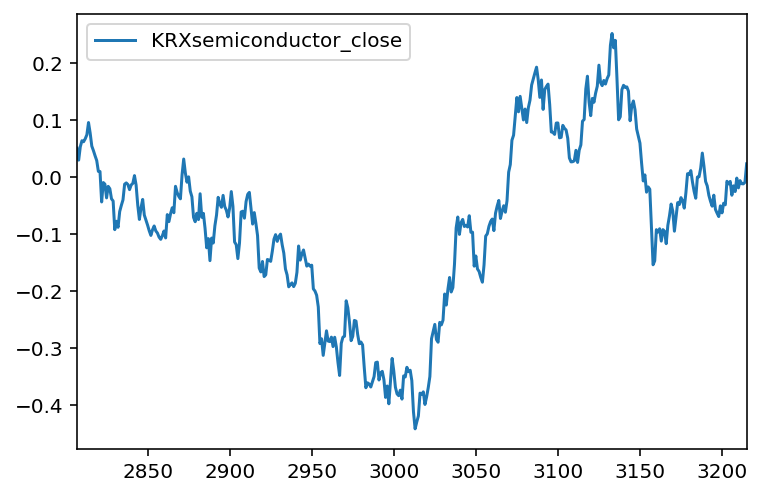

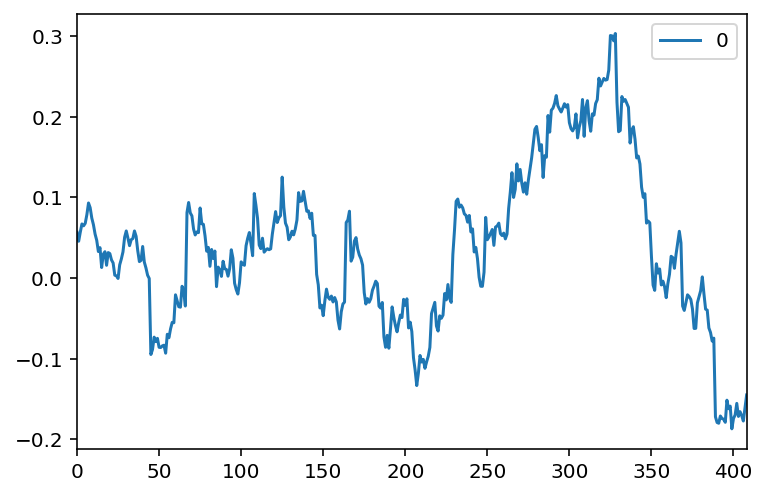

In [43]:
pd.DataFrame(y_test).plot()
pd.DataFrame(ridge_pred).plot()
plt.show()

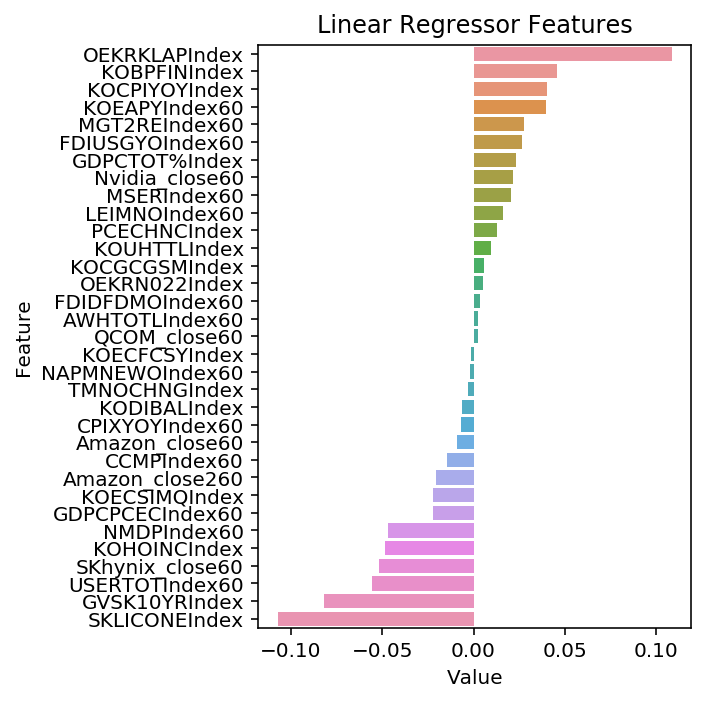

In [39]:
coef_imp = pd.DataFrame(sorted(zip(ridge_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])
coef_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 5))
sns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))
plt.title('Linear Regressor Features')
plt.tight_layout()
plt.show()

In [40]:
a = coef_imp.sort_values(by = 'Value', ascending = False)[0:50]

In [41]:
tree_col = a.Feature.values

In [47]:
'''
coef_imp = pd.DataFrame(sorted(zip(lr_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])
coef_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 7))
sns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))
plt.title('Linear Regressor Features')
plt.tight_layout()
plt.show()
'''

"\ncoef_imp = pd.DataFrame(sorted(zip(lr_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])\ncoef_imp.sort_values(by = 'Value', ascending = False)\nplt.figure(figsize = (5, 7))\nsns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))\nplt.title('Linear Regressor Features')\nplt.tight_layout()\nplt.show()\n"

Tree Model은 feature importance가 따로 뽑히므로 아래와 같이 시각화

# Optuna AutoML을 통한 LightGBM Hyperparameter tuning

hyperparameter tuning 전, Ridge 상위 변수 반영

In [42]:
tree_col

array(['OEKRKLAPIndex', 'KOBPFINIndex', 'KOCPIYOYIndex', 'KOEAPYIndex60',
       'MGT2REIndex60', 'FDIUSGYOIndex60', 'GDPCTOT%Index',
       'Nvidia_close60', 'MSERIndex60', 'LEIMNOIndex60', 'PCECHNCIndex',
       'KOUHTTLIndex', 'KOCGCGSMIndex', 'OEKRN022Index',
       'FDIDFDMOIndex60', 'AWHTOTLIndex60', 'QCOM_close60',
       'KOECFCSYIndex', 'NAPMNEWOIndex60', 'TMNOCHNGIndex',
       'KODIBALIndex', 'CPIXYOYIndex60', 'Amazon_close60', 'CCMPIndex60',
       'Amazon_close260', 'KOECSIMQIndex', 'GDPCPCECIndex60',
       'NMDPIndex60', 'KOHOINCIndex', 'SKhynix_close60', 'USERTOTIndex60',
       'GVSK10YRIndex', 'SKLICONEIndex'], dtype=object)

In [43]:
treedf = df[['OEKRKLAPIndex', 'KOBPFINIndex', 'KOCPIYOYIndex', 'KOEAPYIndex60',
       'MGT2REIndex60', 'FDIUSGYOIndex60', 'GDPCTOT%Index',
       'Nvidia_close60', 'MSERIndex60', 'LEIMNOIndex60', 'PCECHNCIndex',
       'KOUHTTLIndex', 'KOCGCGSMIndex', 'OEKRN022Index',
       'FDIDFDMOIndex60', 'AWHTOTLIndex60', 'QCOM_close60',
       'KOECFCSYIndex', 'NAPMNEWOIndex60', 'TMNOCHNGIndex',
       'KODIBALIndex', 'CPIXYOYIndex60', 'Amazon_close60', 'CCMPIndex60',
       'Amazon_close260', 'KOECSIMQIndex', 'GDPCPCECIndex60',
       'NMDPIndex60', 'KOHOINCIndex', 'SKhynix_close60', 'USERTOTIndex60',
       'GVSK10YRIndex', 'SKLICONEIndex']]

In [66]:
len(treedf)

3216

In [67]:
X_train, X_test, y_train, y_test = train_test_split(treedf, target, test_size = 0.127, shuffle = False)

In [68]:
import sklearn.ensemble
import sklearn.model_selection
from sklearn.metrics import r2_score
import optuna
import optuna.integration.lightgbm as lgb

In [69]:
dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'l2',
    'verbosity': -1,
    'boosting_type': 'gbdt',
}

best_params, tuning_history = dict(), list()

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dval],
                  best_params=best_params,
                  tuning_history=tuning_history,
                  verbose_eval=100,
                  early_stopping_rounds=100,
                  )

prediction = np.rint(model.predict(X_test, num_iteration=model.best_iteration))
r2_score = r2_score(y_test, prediction)

print('Number of finished trials: {}'.format(len(tuning_history)))
print('Best params:', best_params)
print('  r2_score = {}'.format(r2_score))
print('  Params: ')
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

tune_feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000454792	valid_1's l2: 0.0429784
Early stopping, best iteration is:
[1]	training's l2: 0.0346798	valid_1's l2: 0.0373035


tune_feature_fraction, val_score: 0.037304:  14%|#4        | 1/7 [00:00<00:01,  3.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000413161	valid_1's l2: 0.042291
Early stopping, best iteration is:
[5]	training's l2: 0.0168659	valid_1's l2: 0.0342554


tune_feature_fraction, val_score: 0.034255:  29%|##8       | 2/7 [00:00<00:01,  3.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000403716	valid_1's l2: 0.0481636
Early stopping, best iteration is:
[4]	training's l2: 0.0200643	valid_1's l2: 0.0393659


tune_feature_fraction, val_score: 0.034255:  43%|####2     | 3/7 [00:00<00:01,  3.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000401719	valid_1's l2: 0.0509606
Early stopping, best iteration is:
[4]	training's l2: 0.0199628	valid_1's l2: 0.0374251


tune_feature_fraction, val_score: 0.034255:  57%|#####7    | 4/7 [00:01<00:00,  3.39it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000390434	valid_1's l2: 0.0431798
Early stopping, best iteration is:
[6]	training's l2: 0.0140241	valid_1's l2: 0.0368894


tune_feature_fraction, val_score: 0.034255:  71%|#######1  | 5/7 [00:01<00:00,  3.53it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000392735	valid_1's l2: 0.0504658
Early stopping, best iteration is:
[1]	training's l2: 0.0346107	valid_1's l2: 0.0356851


tune_feature_fraction, val_score: 0.034255:  86%|########5 | 6/7 [00:01<00:00,  3.51it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000383527	valid_1's l2: 0.0456137
Early stopping, best iteration is:
[1]	training's l2: 0.034614	valid_1's l2: 0.0354704


tune_num_leaves, val_score: 0.034255:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.033741:   5%|5         | 1/20 [00:00<00:06,  2.88it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000155394	valid_1's l2: 0.0378991
Early stopping, best iteration is:
[1]	training's l2: 0.03432	valid_1's l2: 0.0337395


tune_num_leaves, val_score: 0.033740:  10%|#         | 2/20 [00:01<00:08,  2.16it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000154905	valid_1's l2: 0.0371464
Early stopping, best iteration is:
[1]	training's l2: 0.0343178	valid_1's l2: 0.0337402


tune_num_leaves, val_score: 0.033740:  15%|#5        | 3/20 [00:01<00:07,  2.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.033740:  20%|##        | 4/20 [00:02<00:08,  2.00it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.033740:  25%|##5       | 5/20 [00:02<00:06,  2.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000155823	valid_1's l2: 0.0377007
Early stopping, best iteration is:
[1]	training's l2: 0.0343209	valid_1's l2: 0.0337424


tune_num_leaves, val_score: 0.033740:  30%|###       | 6/20 [00:03<00:06,  2.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000158789	valid_1's l2: 0.0360682
Early stopping, best iteration is:
[1]	training's l2: 0.0343205	valid_1's l2: 0.0337424


tune_num_leaves, val_score: 0.033740:  35%|###5      | 7/20 [00:03<00:06,  2.03it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000422597	valid_1's l2: 0.0401329
Early stopping, best iteration is:
[8]	training's l2: 0.0101973	valid_1's l2: 0.0340724


tune_num_leaves, val_score: 0.033740:  40%|####      | 8/20 [00:03<00:04,  2.51it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.033740:  45%|####5     | 9/20 [00:04<00:04,  2.65it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.033740:  50%|#####     | 10/20 [00:04<00:03,  2.76it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000338734	valid_1's l2: 0.0403249
Early stopping, best iteration is:
[8]	training's l2: 0.00970142	valid_1's l2: 0.0335889


tune_num_leaves, val_score: 0.033589:  55%|#####5    | 11/20 [00:04<00:02,  3.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000486806	valid_1's l2: 0.0422306
Early stopping, best iteration is:
[1]	training's l2: 0.0350457	valid_1's l2: 0.0343711


tune_num_leaves, val_score: 0.033589:  60%|######    | 12/20 [00:04<00:02,  3.83it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00026081	valid_1's l2: 0.0375699
Early stopping, best iteration is:
[8]	training's l2: 0.00937385	valid_1's l2: 0.0320808


tune_num_leaves, val_score: 0.032081:  65%|######5   | 13/20 [00:04<00:01,  4.11it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000239303	valid_1's l2: 0.0367924
Early stopping, best iteration is:
[8]	training's l2: 0.009285	valid_1's l2: 0.0323702


tune_num_leaves, val_score: 0.032081:  70%|#######   | 14/20 [00:05<00:01,  4.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00021632	valid_1's l2: 0.0396115
Early stopping, best iteration is:
[1]	training's l2: 0.0344279	valid_1's l2: 0.0340138


tune_num_leaves, val_score: 0.032081:  75%|#######5  | 15/20 [00:05<00:01,  4.36it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00182921	valid_1's l2: 0.0379082
Early stopping, best iteration is:
[35]	training's l2: 0.00502431	valid_1's l2: 0.0307067


tune_num_leaves, val_score: 0.030707:  80%|########  | 16/20 [00:05<00:00,  5.20it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00154484	valid_1's l2: 0.0385105
Early stopping, best iteration is:
[1]	training's l2: 0.0372744	valid_1's l2: 0.0327146


tune_num_leaves, val_score: 0.030707:  85%|########5 | 17/20 [00:05<00:00,  6.08it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000151135	valid_1's l2: 0.0372373
Early stopping, best iteration is:
[1]	training's l2: 0.0343172	valid_1's l2: 0.0337406


tune_num_leaves, val_score: 0.030707:  90%|######### | 18/20 [00:05<00:00,  4.90it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00573806	valid_1's l2: 0.0309756
[200]	training's l2: 0.00307057	valid_1's l2: 0.0319152
Early stopping, best iteration is:
[137]	training's l2: 0.0043124	valid_1's l2: 0.0301019


tune_num_leaves, val_score: 0.030102:  95%|#########5| 19/20 [00:06<00:00,  5.67it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189233	valid_1's l2: 0.038192
Early stopping, best iteration is:
[1]	training's l2: 0.0343669	valid_1's l2: 0.0337613


tune_num_leaves, val_score: 0.030102: 100%|##########| 20/20 [00:06<00:00,  3.11it/s]
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00554351	valid_1's l2: 0.031805
Early stopping, best iteration is:
[69]	training's l2: 0.00751709	valid_1's l2: 0.0304239


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:   0%|          | 0/10 [00:00<?, ?it/s][I 2020-03-26 13:40:23,629] Finished trial#0 resulted in value: 0.03042393643980559. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  10%|#         | 1/10 [00:00<00:00,  9.45it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00564951	valid_1's l2: 0.0345194
Early stopping, best iteration is:
[61]	training's l2: 0.00842179	valid_1's l2: 0.0329951


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  20%|##        | 2/10 [00:00<00:00, 12.60it/s][I 2020-03-26 13:40:23,739] Finished trial#1 resulted in value: 0.03299514292960379. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  20%|##        | 2/10 [00:00<00:00, 12.60it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00578373	valid_1's l2: 0.0316911
[200]	training's l2: 0.00310941	valid_1's l2: 0.0342731
Early stopping, best iteration is:
[138]	training's l2: 0.0043798	valid_1's l2: 0.0313789


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  30%|###       | 3/10 [00:00<00:00, 10.77it/s][I 2020-03-26 13:40:23,861] Finished trial#2 resulted in value: 0.031378868572900634. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  30%|###       | 3/10 [00:00<00:00, 10.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00551976	valid_1's l2: 0.0366721
Early stopping, best iteration is:
[53]	training's l2: 0.00922349	valid_1's l2: 0.0347338


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  30%|###       | 3/10 [00:00<00:00, 10.77it/s][I 2020-03-26 13:40:23,959] Finished trial#3 resulted in value: 0.03473375552383966. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  40%|####      | 4/10 [00:00<00:00, 10.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00563366	valid_1's l2: 0.0339428
[200]	training's l2: 0.00304076	valid_1's l2: 0.0343661
Early stopping, best iteration is:
[146]	training's l2: 0.00401347	valid_1's l2: 0.0328143


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  50%|#####     | 5/10 [00:00<00:00, 10.04it/s][I 2020-03-26 13:40:24,093] Finished trial#4 resulted in value: 0.03281433916486728. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  50%|#####     | 5/10 [00:00<00:00, 10.04it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00563689	valid_1's l2: 0.0349582
Early stopping, best iteration is:
[52]	training's l2: 0.00943857	valid_1's l2: 0.0330765


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  60%|######    | 6/10 [00:00<00:00,  9.87it/s][I 2020-03-26 13:40:24,198] Finished trial#5 resulted in value: 0.033076491870596136. Current best value is 0.03042393643980559 with parameters: {'bagging_fraction': 0.6531284017441199, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  60%|######    | 6/10 [00:00<00:00,  9.87it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00536904	valid_1's l2: 0.0319833
[200]	training's l2: 0.00287238	valid_1's l2: 0.0347788
Early stopping, best iteration is:
[112]	training's l2: 0.00488058	valid_1's l2: 0.0302628


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  70%|#######   | 7/10 [00:00<00:00,  9.23it/s][I 2020-03-26 13:40:24,322] Finished trial#6 resulted in value: 0.030262842547111264. Current best value is 0.030262842547111264 with parameters: {'bagging_fraction': 0.6347424308708791, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  70%|#######   | 7/10 [00:00<00:00,  9.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0055939	valid_1's l2: 0.0328404
Early stopping, best iteration is:
[94]	training's l2: 0.00589941	valid_1's l2: 0.031657


tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  80%|########  | 8/10 [00:00<00:00,  9.18it/s][I 2020-03-26 13:40:24,436] Finished trial#7 resulted in value: 0.03165701952592645. Current best value is 0.030262842547111264 with parameters: {'bagging_fraction': 0.6347424308708791, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030102:  80%|########  | 8/10 [00:00<00:00,  9.18it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00566923	valid_1's l2: 0.0301236
Early stopping, best iteration is:
[74]	training's l2: 0.00725917	valid_1's l2: 0.0295515


tune_bagging_fraction_and_bagging_freq, val_score: 0.029551:  90%|######### | 9/10 [00:00<00:00,  9.08it/s][I 2020-03-26 13:40:24,543] Finished trial#8 resulted in value: 0.029551468688835316. Current best value is 0.029551468688835316 with parameters: {'bagging_fraction': 0.6410474262098881, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.029551:  90%|######### | 9/10 [00:01<00:00,  9.08it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00565724	valid_1's l2: 0.0350231
Early stopping, best iteration is:
[20]	training's l2: 0.0168651	valid_1's l2: 0.0344099


tune_bagging_fraction_and_bagging_freq, val_score: 0.029551:  90%|######### | 9/10 [00:01<00:00,  9.08it/s][I 2020-03-26 13:40:24,630] Finished trial#9 resulted in value: 0.03440990313138536. Current best value is 0.029551468688835316 with parameters: {'bagging_fraction': 0.6410474262098881, 'bagging_freq': 3}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.029551: 100%|##########| 10/10 [00:01<00:00,  9.04it/s]
tune_feature_fraction, val_score: 0.029551:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00560136	valid_1's l2: 0.0323675
[200]	training's l2: 0.00307392	valid_1's l2: 0.0330422
Early stopping, best iteration is:
[138]	training's l2: 0.00422362	valid_1's l2: 0.0316756


tune_feature_fraction, val_score: 0.029551:  17%|#6        | 1/6 [00:00<00:00,  8.65it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00553364	valid_1's l2: 0.0330415
[200]	training's l2: 0.00292117	valid_1's l2: 0.0345259
Early stopping, best iteration is:
[137]	training's l2: 0.00412127	valid_1's l2: 0.032163


tune_feature_fraction, val_score: 0.029551:  33%|###3      | 2/6 [00:00<00:00, 11.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00532293	valid_1's l2: 0.0335164
Early stopping, best iteration is:
[72]	training's l2: 0.00691805	valid_1's l2: 0.0330335


tune_feature_fraction, val_score: 0.029551:  50%|#####     | 3/6 [00:00<00:00, 11.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00566923	valid_1's l2: 0.0301236
Early stopping, best iteration is:
[74]	training's l2: 0.00725917	valid_1's l2: 0.0295515


tune_feature_fraction, val_score: 0.029551:  67%|######6   | 4/6 [00:00<00:00, 11.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00555321	valid_1's l2: 0.0306023
Early stopping, best iteration is:
[75]	training's l2: 0.00709953	valid_1's l2: 0.0291759


tune_feature_fraction, val_score: 0.029176:  83%|########3 | 5/6 [00:00<00:00, 11.06it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00549093	valid_1's l2: 0.0328203
[200]	training's l2: 0.00299485	valid_1's l2: 0.0336506
Early stopping, best iteration is:
[135]	training's l2: 0.00422538	valid_1's l2: 0.0316861


tune_feature_fraction, val_score: 0.029176: 100%|##########| 6/6 [00:00<00:00,  9.41it/s]
tune_lambda_l1_and_lambda_l2, val_score: 0.029176:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00556139	valid_1's l2: 0.03074
Early stopping, best iteration is:
[75]	training's l2: 0.00710186	valid_1's l2: 0.029175


tune_lambda_l1_and_lambda_l2, val_score: 0.029175:   0%|          | 0/20 [00:00<?, ?it/s][I 2020-03-26 13:40:25,371] Finished trial#0 resulted in value: 0.029175042058701913. Current best value is 0.029175042058701913 with parameters: {'lambda_l1': 1.999062081317387e-05, 'lambda_l2': 0.0471010422223841}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029175:   5%|5         | 1/20 [00:00<00:01, 10.46it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00555322	valid_1's l2: 0.0306023
Early stopping, best iteration is:
[75]	training's l2: 0.00709954	valid_1's l2: 0.0291759


tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  10%|#         | 2/20 [00:00<00:01, 14.14it/s][I 2020-03-26 13:40:25,468] Finished trial#1 resulted in value: 0.02917593265158254. Current best value is 0.029175042058701913 with parameters: {'lambda_l1': 1.999062081317387e-05, 'lambda_l2': 0.0471010422223841}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  10%|#         | 2/20 [00:00<00:01, 14.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00564255	valid_1's l2: 0.0323967
[200]	training's l2: 0.00309893	valid_1's l2: 0.0334539
Early stopping, best iteration is:
[141]	training's l2: 0.0041967	valid_1's l2: 0.0313265


tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  15%|#5        | 3/20 [00:00<00:01, 11.86it/s][I 2020-03-26 13:40:25,587] Finished trial#2 resulted in value: 0.03132646539325659. Current best value is 0.029175042058701913 with parameters: {'lambda_l1': 1.999062081317387e-05, 'lambda_l2': 0.0471010422223841}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  15%|#5        | 3/20 [00:00<00:01, 11.86it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00555372	valid_1's l2: 0.0306021
Early stopping, best iteration is:
[75]	training's l2: 0.0071001	valid_1's l2: 0.0291757


tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  20%|##        | 4/20 [00:00<00:01, 11.14it/s][I 2020-03-26 13:40:25,691] Finished trial#3 resulted in value: 0.029175715781829703. Current best value is 0.029175042058701913 with parameters: {'lambda_l1': 1.999062081317387e-05, 'lambda_l2': 0.0471010422223841}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  20%|##        | 4/20 [00:00<00:01, 11.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00620569	valid_1's l2: 0.0337036
[200]	training's l2: 0.00360491	valid_1's l2: 0.0352134
Early stopping, best iteration is:
[140]	training's l2: 0.004795	valid_1's l2: 0.0329539


tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  25%|##5       | 5/20 [00:00<00:01,  9.38it/s][I 2020-03-26 13:40:25,832] Finished trial#4 resulted in value: 0.03295390532028411. Current best value is 0.029175042058701913 with parameters: {'lambda_l1': 1.999062081317387e-05, 'lambda_l2': 0.0471010422223841}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029175:  25%|##5       | 5/20 [00:00<00:01,  9.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00735662	valid_1's l2: 0.0286302
[200]	training's l2: 0.00468932	valid_1's l2: 0.0305761
Early stopping, best iteration is:
[138]	training's l2: 0.00600105	valid_1's l2: 0.027848


tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  30%|###       | 6/20 [00:00<00:01,  9.22it/s][I 2020-03-26 13:40:25,945] Finished trial#5 resulted in value: 0.027848033586374384. Current best value is 0.027848033586374384 with parameters: {'lambda_l1': 3.9317837688110435, 'lambda_l2': 0.002883876549944747}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  30%|###       | 6/20 [00:00<00:01,  9.22it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00561816	valid_1's l2: 0.0333348
Early stopping, best iteration is:
[74]	training's l2: 0.00723278	valid_1's l2: 0.0323464


tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  35%|###5      | 7/20 [00:00<00:01,  9.24it/s][I 2020-03-26 13:40:26,053] Finished trial#6 resulted in value: 0.03234640929207311. Current best value is 0.027848033586374384 with parameters: {'lambda_l1': 3.9317837688110435, 'lambda_l2': 0.002883876549944747}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  35%|###5      | 7/20 [00:00<00:01,  9.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00556101	valid_1's l2: 0.0307402
Early stopping, best iteration is:
[75]	training's l2: 0.00710144	valid_1's l2: 0.0291752


tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  40%|####      | 8/20 [00:00<00:01,  9.41it/s][I 2020-03-26 13:40:26,154] Finished trial#7 resulted in value: 0.029175205409463965. Current best value is 0.027848033586374384 with parameters: {'lambda_l1': 3.9317837688110435, 'lambda_l2': 0.002883876549944747}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  40%|####      | 8/20 [00:00<00:01,  9.41it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0055808	valid_1's l2: 0.0314318
[200]	training's l2: 0.00292526	valid_1's l2: 0.0348849
Early stopping, best iteration is:
[122]	training's l2: 0.00463388	valid_1's l2: 0.0304656


tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  45%|####5     | 9/20 [00:00<00:01,  9.09it/s][I 2020-03-26 13:40:26,274] Finished trial#8 resulted in value: 0.030465568421794233. Current best value is 0.027848033586374384 with parameters: {'lambda_l1': 3.9317837688110435, 'lambda_l2': 0.002883876549944747}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  45%|####5     | 9/20 [00:00<00:01,  9.09it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00555322	valid_1's l2: 0.0306023
Early stopping, best iteration is:
[75]	training's l2: 0.00709955	valid_1's l2: 0.0291759


tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  45%|####5     | 9/20 [00:01<00:01,  9.09it/s][I 2020-03-26 13:40:26,369] Finished trial#9 resulted in value: 0.029175929698832707. Current best value is 0.027848033586374384 with parameters: {'lambda_l1': 3.9317837688110435, 'lambda_l2': 0.002883876549944747}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027848:  50%|#####     | 10/20 [00:01<00:01,  9.09it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00994785	valid_1's l2: 0.0287131
Early stopping, best iteration is:
[73]	training's l2: 0.0114638	valid_1's l2: 0.0277199


tune_lambda_l1_and_lambda_l2, val_score: 0.027720:  55%|#####5    | 11/20 [00:01<00:00,  9.37it/s][I 2020-03-26 13:40:26,471] Finished trial#10 resulted in value: 0.027719859204837712. Current best value is 0.027719859204837712 with parameters: {'lambda_l1': 9.353523806710431, 'lambda_l2': 1.3637715974838262e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027720:  55%|#####5    | 11/20 [00:01<00:00,  9.37it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0102298	valid_1's l2: 0.0281153
Early stopping, best iteration is:
[71]	training's l2: 0.0118938	valid_1's l2: 0.0275882


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  60%|######    | 12/20 [00:01<00:00,  9.39it/s][I 2020-03-26 13:40:26,578] Finished trial#11 resulted in value: 0.02758815643599818. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  60%|######    | 12/20 [00:01<00:00,  9.39it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00557829	valid_1's l2: 0.0314327
[200]	training's l2: 0.00292308	valid_1's l2: 0.0348886
Early stopping, best iteration is:
[122]	training's l2: 0.00463122	valid_1's l2: 0.0304663


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  65%|######5   | 13/20 [00:01<00:00,  9.15it/s][I 2020-03-26 13:40:26,694] Finished trial#12 resulted in value: 0.03046630878526881. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  65%|######5   | 13/20 [00:01<00:00,  9.15it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00560504	valid_1's l2: 0.0309874
Early stopping, best iteration is:
[77]	training's l2: 0.00699861	valid_1's l2: 0.0299553


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  70%|#######   | 14/20 [00:01<00:00,  9.31it/s][I 2020-03-26 13:40:26,796] Finished trial#13 resulted in value: 0.029955263257448617. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  70%|#######   | 14/20 [00:01<00:00,  9.31it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.010253	valid_1's l2: 0.0283824
Early stopping, best iteration is:
[73]	training's l2: 0.0117053	valid_1's l2: 0.0280363


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  75%|#######5  | 15/20 [00:01<00:00,  9.44it/s][I 2020-03-26 13:40:26,899] Finished trial#14 resulted in value: 0.028036343073451205. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  75%|#######5  | 15/20 [00:01<00:00,  9.44it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00556048	valid_1's l2: 0.0307406
Early stopping, best iteration is:
[75]	training's l2: 0.00710068	valid_1's l2: 0.0291758


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  80%|########  | 16/20 [00:01<00:00,  9.54it/s][I 2020-03-26 13:40:27,001] Finished trial#15 resulted in value: 0.029175800139164054. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  80%|########  | 16/20 [00:01<00:00,  9.54it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00569131	valid_1's l2: 0.0314336
Early stopping, best iteration is:
[97]	training's l2: 0.00583745	valid_1's l2: 0.0308557


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  85%|########5 | 17/20 [00:01<00:00,  9.46it/s][I 2020-03-26 13:40:27,108] Finished trial#16 resulted in value: 0.03085566476705557. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  85%|########5 | 17/20 [00:01<00:00,  9.46it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00555342	valid_1's l2: 0.0306023
Early stopping, best iteration is:
[75]	training's l2: 0.00709973	valid_1's l2: 0.0291759


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  90%|######### | 18/20 [00:01<00:00,  9.58it/s][I 2020-03-26 13:40:27,211] Finished trial#17 resulted in value: 0.02917591119003353. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  90%|######### | 18/20 [00:01<00:00,  9.58it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00575962	valid_1's l2: 0.0335839
Early stopping, best iteration is:
[76]	training's l2: 0.00727285	valid_1's l2: 0.0320804


tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  95%|#########5| 19/20 [00:01<00:00,  9.56it/s][I 2020-03-26 13:40:27,315] Finished trial#18 resulted in value: 0.032080409750913086. Current best value is 0.02758815643599818 with parameters: {'lambda_l1': 9.813610192198194, 'lambda_l2': 1.3357083441182017e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027588:  95%|#########5| 19/20 [00:02<00:00,  9.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00925394	valid_1's l2: 0.0286844
[200]	training's l2: 0.00693622	valid_1's l2: 0.0286761
Early stopping, best iteration is:
[136]	training's l2: 0.00806628	valid_1's l2: 0.0275073


tune_lambda_l1_and_lambda_l2, val_score: 0.027507: 100%|##########| 20/20 [00:02<00:00,  9.29it/s][I 2020-03-26 13:40:27,429] Finished trial#19 resulted in value: 0.027507308566960428. Current best value is 0.027507308566960428 with parameters: {'lambda_l1': 8.2328391073383, 'lambda_l2': 1.7491045362391713e-08}.
tune_lambda_l1_and_lambda_l2, val_score: 0.027507: 100%|##########| 20/20 [00:02<00:00,  9.28it/s]
tune_min_child_samples, val_score: 0.027507:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00925394	valid_1's l2: 0.0286844
[200]	training's l2: 0.00693622	valid_1's l2: 0.0286761
Early stopping, best iteration is:
[136]	training's l2: 0.00806628	valid_1's l2: 0.0275073


tune_min_child_samples, val_score: 0.027507:  20%|##        | 1/5 [00:00<00:00,  6.79it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00925394	valid_1's l2: 0.0286844
[200]	training's l2: 0.00693622	valid_1's l2: 0.0286761
Early stopping, best iteration is:
[136]	training's l2: 0.00806628	valid_1's l2: 0.0275073


tune_min_child_samples, val_score: 0.027507:  40%|####      | 2/5 [00:00<00:00,  9.74it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00925394	valid_1's l2: 0.0286844
[200]	training's l2: 0.00693622	valid_1's l2: 0.0286761
Early stopping, best iteration is:
[136]	training's l2: 0.00806628	valid_1's l2: 0.0275073


tune_min_child_samples, val_score: 0.027507:  60%|######    | 3/5 [00:00<00:00,  9.50it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00932703	valid_1's l2: 0.0278554
[200]	training's l2: 0.0069068	valid_1's l2: 0.0283799
Early stopping, best iteration is:
[156]	training's l2: 0.0075926	valid_1's l2: 0.0271458


tune_min_child_samples, val_score: 0.027146:  80%|########  | 4/5 [00:00<00:00,  9.19it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00947261	valid_1's l2: 0.0283283
Early stopping, best iteration is:
[71]	training's l2: 0.0111464	valid_1's l2: 0.0274173


tune_min_child_samples, val_score: 0.027146: 100%|##########| 5/5 [00:00<00:00,  8.62it/s]


Number of finished trials: 68
Best params: {'lambda_l1': 8.2328391073383, 'lambda_l2': 1.7491045362391713e-08, 'num_leaves': 3, 'feature_fraction': 0.5479999999999999, 'bagging_fraction': 0.6410474262098881, 'bagging_freq': 3, 'min_child_samples': 50}
  r2_score = -0.2800856102454148
  Params: 
    lambda_l1: 8.2328391073383
    lambda_l2: 1.7491045362391713e-08
    num_leaves: 3
    feature_fraction: 0.5479999999999999
    bagging_fraction: 0.6410474262098881
    bagging_freq: 3
    min_child_samples: 50


### Tuning된 값 입력하여 모델 선언

In [70]:
lgb_reg = LGBMRegressor()

In [77]:
lgb_reg = LGBMRegressor(lambda_l1 = 8.2328391073383, lambda_l2 = 1.7491045362391713e-08, num_leaves = 3, feature_fraction = 0.5479999999999999, bagging_fraction = 0.6410474262098881, bagging_freq = 3, min_child_samples = 50)

In [78]:
lgb_reg.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.6410474262098881, bagging_freq=3,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.5479999999999999, importance_type='split',
              lambda_l1=8.2328391073383, lambda_l2=1.7491045362391713e-08,
              learning_rate=0.1, max_depth=-1, min_child_samples=50,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=3, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [79]:
lgb_pred = lgb_reg.predict(X_test)

In [80]:
y_test = np.array(y_test)

In [81]:
metr = CustomMetric(lgb_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.769175,-0.2141,0.1425,0.1669,0.420538,0.800971


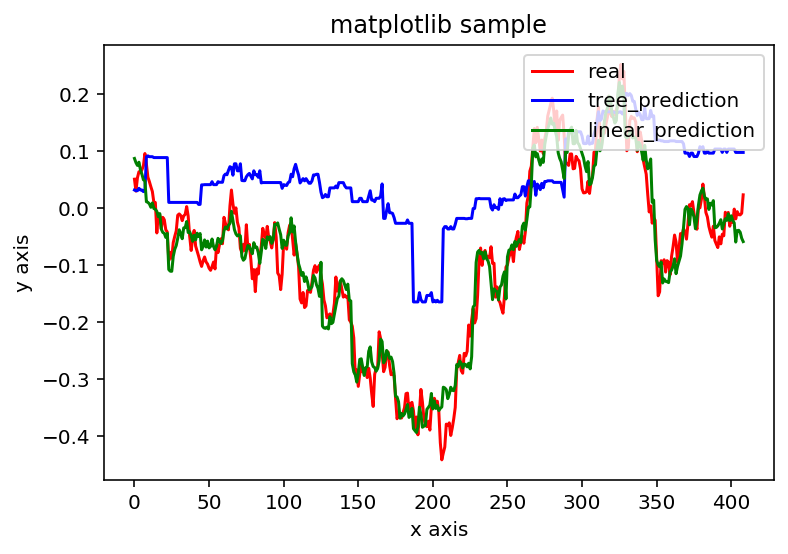

In [82]:
plt.plot(y_test,'red',label='real')
plt.plot(lgb_pred,'blue',label='tree_prediction')
plt.plot(ridge_pred,'green',label='linear_prediction')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()

In [85]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

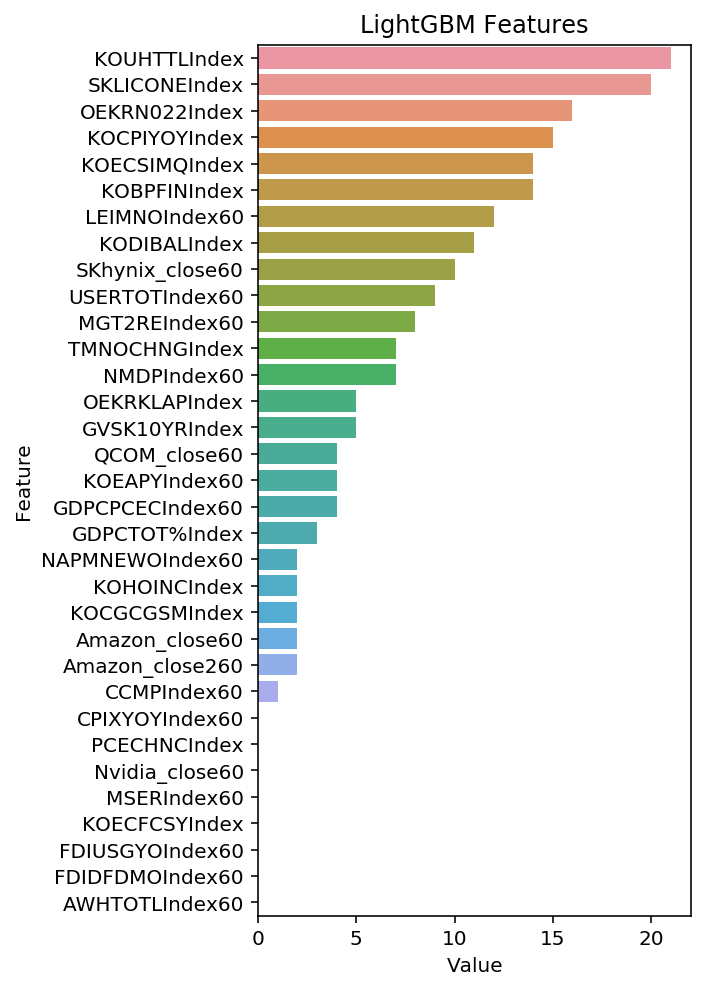

In [84]:
feat_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_, X_train.columns)), columns = ['Value', 'Feature'])
feat_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 7))
sns.barplot(x = 'Value', y = 'Feature', data = feat_imp.sort_values(by = 'Value', ascending = False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.savefig('lgbm_importances_1.png')
plt.show()